DATASET DOWNLOAD AND EXTRACT

In [1]:
import numpy as np
import tensorflow as tf
from scipy.io import loadmat
from utility import plot_confusion_matrix
import tensorflow.keras.layers as layer
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
seed = 1231829
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
from data_loader import get_data
X_data, labels = get_data()

/Users/denisderonjic/Repos/ActivityRecognition/data_loader.py:108: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return (np.array(X_data), labels)


In [4]:
print(X_data.shape)
print(labels.shape)

(761,)
(761,)


FALLING


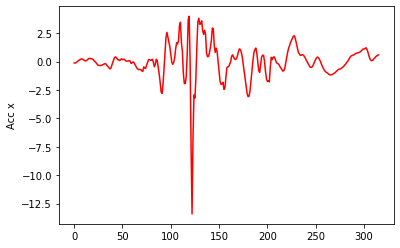

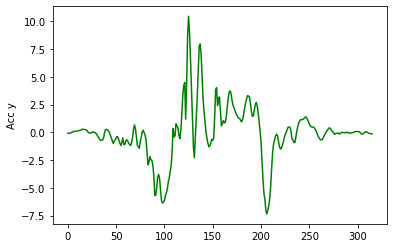

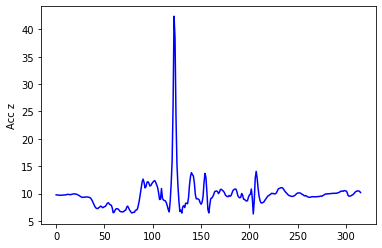

In [5]:
import matplotlib.pyplot as plt

measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [6]:
from data_transformation import frame_data

X_data, y_data = frame_data(X_data, labels)

In [7]:
X_data = X_data[:,:, :6] #Dropping magnetometer

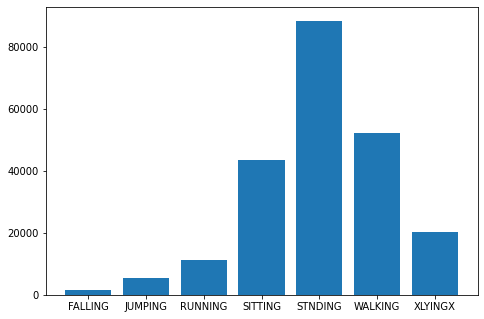

In [8]:
unique, counts = np.unique(y_data, return_counts=True)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,counts)
plt.show()

In [9]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

y_data = le.fit_transform(y_data)

In [10]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

num_labels = len(le_name_mapping)
print(num_labels)

{'FALLING': 0, 'JUMPING': 1, 'RUNNING': 2, 'SITTING': 3, 'STNDING': 4, 'WALKING': 5, 'XLYINGX': 6}
7


In [11]:
import data_transformation as dt

#X_data, y_data = dt.data_augmentation(X_data, y_data, [dt.jitter, dt.scaling, dt.rotation])

FALLING


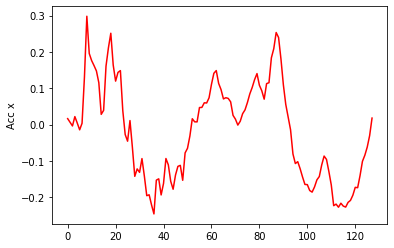

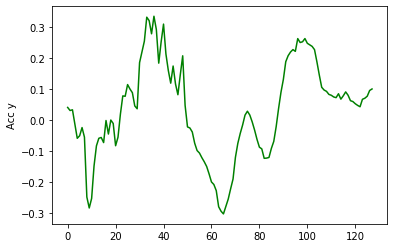

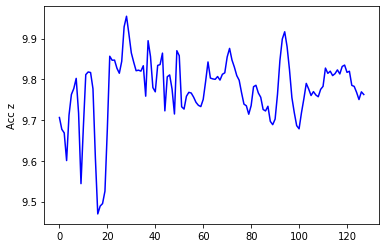

In [12]:
measure = 10
print(labels[measure])
accX = X_data[measure][:, 0]
#accX = np.fft.fft(accX)
plt.plot(accX, color='r')
plt.ylabel('Acc x')
plt.show()

accY = X_data[measure][:, 1]
#accY = np.fft.fft(accY)
plt.plot(accY, color='g')
plt.ylabel('Acc y')
plt.show()

accZ = X_data[measure][:, 2]
#accZ = np.fft.fft(accZ)
plt.plot(accZ, color='b')
plt.ylabel('Acc z')
plt.show()
del accX, accY, accZ

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

stratifiedSplit = True

if stratifiedSplit:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=seed)
    for train_index, test_index in split.split(X_data, y_data):
        X_train.append(X_data[train_index])
        y_train.append(y_data[train_index])
        X_test.append(X_data[test_index])
        y_test.append(y_data[test_index])
    X_train = np.array(X_train[0])
    y_train = np.array(y_train[0])
    X_test = np.array(X_test[0])
    y_test = np.array(y_test[0])
else:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=seed)

In [14]:
#check https://stackoverflow.com/questions/59979763/cant-get-done-conv1d-with-tf-keras
#check https://stats.stackexchange.com/questions/264546/difference-between-samples-time-steps-and-features-in-neural-network
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [15]:
#fig, axs = plt.subplots(3, 2)
#fig.set_figheight(15)
#fig.set_figwidth(15)
#axs[0, 0].plot(X_train[measure,:,0], 'tab:red')
#axs[0, 0].set_title('Real Acc x')
#axs[0, 1].plot(X_prova[measure,:,0], 'tab:red')
#axs[0, 1].set_title('Pred Acc x')
#
#axs[1, 0].plot(X_train[measure,:,1], 'tab:green')
#axs[1, 0].set_title('Real Acc y')
#axs[1, 1].plot(X_prova[measure,:,1], 'tab:green')
#axs[1, 1].set_title('Pred Acc y')
#
#axs[2, 0].plot(X_train[measure,:,2], 'tab:blue')
#axs[2, 0].set_title('Real Acc 1')
#axs[2, 1].plot(X_prova[measure,:,2], 'tab:blue')
#axs[2, 1].set_title('Pred Acc 1')

In [16]:
#X_train_norm = np.linalg.norm(X_train[:,:,0:3], axis=2, keepdims=True)
#X_test_norm = np.linalg.norm(X_test[:,:,0:3], axis=2, keepdims=True)
#X_train = np.concatenate([X_train, X_train_norm], axis=2)
#X_test = np.concatenate([X_test, X_test_norm], axis=2)

In [17]:
print(X_train.shape)

(155666, 128, 6)


In [18]:
from data_transformation import data_normalization

X_train = data_normalization(X_train)
X_test = data_normalization(X_test)

2021-09-07 17:49:14.049104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-09-07 17:49:14.049260: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


# Classification NN

In [19]:
from models import buildInceptionModelV2

  

model = buildInceptionModelV2((128, 6), num_labels, 6)

model_test_data = X_train[0:10, :, :]
x = model(model_test_data)
print(x.shape)

(10, 7)


In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 6)]          0         
_________________________________________________________________
inception_block_v2_4 (Incept (None, 128, 128)          72736     
_________________________________________________________________
inception_block_v2_5 (Incept (None, 128, 128)          80544     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 154,183
Trainable params: 153,671
Non-trainable params: 512
_________________________________________________________________


In [21]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=False)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [22]:
print(X_train.shape)
print(y_train.shape)

(155666, 128, 6)
(155666,)


In [23]:
from sklearn.utils import class_weight

class_weights_list = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights = {}
for i in range(num_labels):
  w = class_weights_list[i]
  class_weights[i] = w
print(class_weights)

{0: 22.193612774451097, 1: 5.707905544147844, 2: 2.8631389210763487, 3: 0.7321634346294407, 4: 0.3592974972937166, 5: 0.6094105395851032, 6: 1.5612187587756248}


/Users/denisderonjic/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3 4 5 6], y=[4 5 5 ... 4 4 4] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [24]:
#from focal_loss import SparseCategoricalFocalLoss

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#loss_object = SparseCategoricalFocalLoss(gamma=2.0)
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_object, metrics=['acc'])


In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5)
history = model.fit(X_train, y_train,
                epochs=100,
                shuffle=True,
                batch_size=256,
                validation_split=0.2,
                #class_weight=class_weights,
                callbacks=[callback])

Epoch 1/100
487/487 [==============================] - 95s 195ms/step - loss: 0.5713 - acc: 0.7895 - val_loss: 0.5270 - val_acc: 0.8146
Epoch 2/100
487/487 [==============================] - 96s 196ms/step - loss: 0.3477 - acc: 0.8700 - val_loss: 0.3328 - val_acc: 0.8747
Epoch 3/100
487/487 [==============================] - 96s 197ms/step - loss: 0.2711 - acc: 0.9001 - val_loss: 0.2640 - val_acc: 0.9007
Epoch 4/100
487/487 [==============================] - 96s 197ms/step - loss: 0.2237 - acc: 0.9183 - val_loss: 0.2548 - val_acc: 0.9023
Epoch 5/100
487/487 [==============================] - 96s 198ms/step - loss: 0.1806 - acc: 0.9344 - val_loss: 0.1902 - val_acc: 0.9289
Epoch 6/100
487/487 [==============================] - 96s 198ms/step - loss: 0.1531 - acc: 0.9451 - val_loss: 0.1913 - val_acc: 0.9271
Epoch 7/100
487/487 [==============================] - 100s 205ms/step - loss: 0.1331 - acc: 0.9526 - val_loss: 0.1611 - val_acc: 0.9427
Epoch 8/100
487/487 [==========================

In [26]:
#model.save('inception_model.h5')

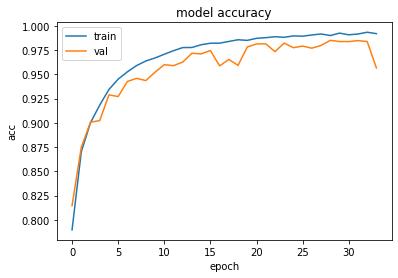

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
from sklearn.model_selection import KFold

results = []
kf = KFold(n_splits=5)
for train_idx, val_idx in kf.split(X_train, y_train):
  #train_x = X_train[train_idx]
  #train_y = y_train[train_idx]
  val_x = X_train[val_idx]
  val_y = y_train[val_idx]
  loss, acc = model.evaluate(val_x, val_y)
  results.append(acc)
print(results)
print(np.mean(results))

973/973 [==============================] - 11s 11ms/step - loss: 0.1499 - acc: 0.9566
[0.9659536480903625, 0.9644107818603516, 0.965021014213562, 0.9649889469146729, 0.9566055536270142]
0.9633959889411926


In [29]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)

2085/2085 - 23s - loss: 0.1576 - acc: 0.9563


In [30]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

In [31]:
import time

X_batch = X_test[:100]
start = time.perf_counter() 
result = model.predict(X_batch)
end = time.perf_counter()

print(end - start)

0.05406200000015815


In [32]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
print("Precision score: ", precision_score(y_test, y_pred, average='macro'))
print("Recall score: ", recall_score(y_test, y_pred, average='macro'))

Precision score:  0.9464501137588738
Recall score:  0.9569050783491971


In [33]:
from sklearn.metrics import precision_score, recall_score

#None, 'micro', 'macro', 'weighted'
precisions = precision_score(y_test, y_pred, average=None)
recalls = recall_score(y_test, y_pred, average=None)
print("Precision score: ", precisions)
print("Recall score: ", recalls)

Precision score:  [0.93045564 0.9822195  0.99430285 0.92713904 0.98195609 0.996099
 0.81297869]
Recall score:  [0.9044289  0.95928144 0.99609492 0.95897672 0.9273166  0.99597161
 0.95626536]


In [34]:
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": Precision " + str(precisions[i]) + " --- Recall " + str(recalls[i]))

FALLING: Precision 0.9304556354916067 --- Recall 0.9044289044289044
JUMPING: Precision 0.9822194972409565 --- Recall 0.9592814371257485
RUNNING: Precision 0.9943028485757122 --- Recall 0.9960949234004205
SITTING: Precision 0.9271390374331551 --- Recall 0.9589767227471768
STNDING: Precision 0.9819560878243513 --- Recall 0.9273165950388298
WALKING: Precision 0.9960989959710942 --- Recall 0.9959716094379436
XLYINGX: Precision 0.8129786937752402 --- Recall 0.9562653562653562


In [35]:
from sklearn.metrics import f1_score

f1_scores = f1_score(y_test, y_pred, average=None)
for i in range(num_labels):
    print(le.inverse_transform([i])[0]+": F1-score " + str(f1_scores[i]))

FALLING: F1-score 0.9172576832151301
JUMPING: F1-score 0.9706149651620721
RUNNING: F1-score 0.9951980792316927
SITTING: F1-score 0.9427891695932934
STNDING: F1-score 0.9538545059717698
WALKING: F1-score 0.9960352986315386
XLYINGX: F1-score 0.8788198103266596


In [36]:
import matplotlib.cm

def plot_confusion_matrix(predictions, labels, target_names):

  '''
  ============================
  Internal function definition
  ============================
  '''
  def _confusion_matrix(cm,
                            target_names,
                            title='Confusion matrix',
                            cmap=None):
      import itertools

      accuracy = np.trace(cm) / float(np.sum(cm))
      misclass = 1 - accuracy

      if cmap is None:
          cmap = plt.get_cmap('Reds')
      
      cm = cm.astype('float')
      for i in range(len(cm)):
        cm[i] /= float(np.sum(cm[i]))

      plt.figure(figsize=(16, 12))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()

      if target_names is not None:
          tick_marks = np.arange(len(target_names))
          plt.xticks(tick_marks, target_names, rotation=45)
          plt.yticks(tick_marks, target_names)


      thresh = cm.max() / 2
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                      horizontalalignment="center",
                      color="white" if cm[i, j] > thresh else "black")
              


      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
      plt.show()
  '''
  ===================================
  End of internal function definition
  ===================================
  '''

  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(predictions, labels)
  _confusion_matrix(conf_mat, target_names=target_names)

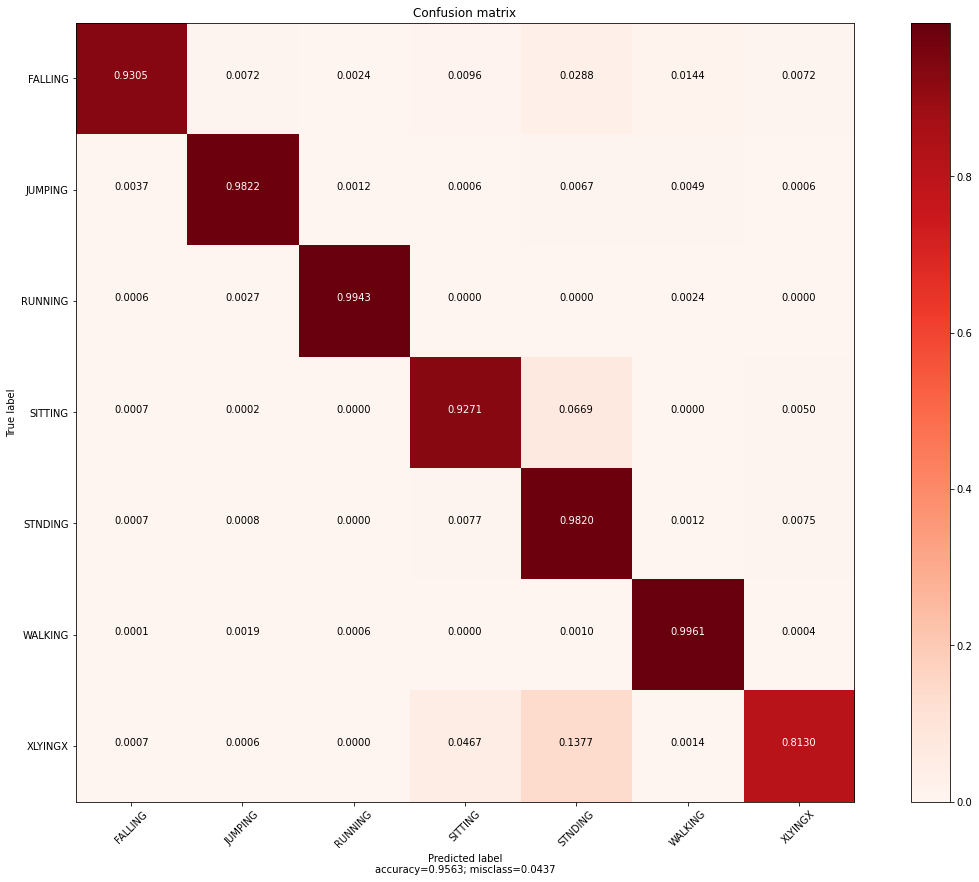

In [37]:
plot_confusion_matrix(y_pred, y_test, target_names=le.classes_)